# Air Quality Prediction

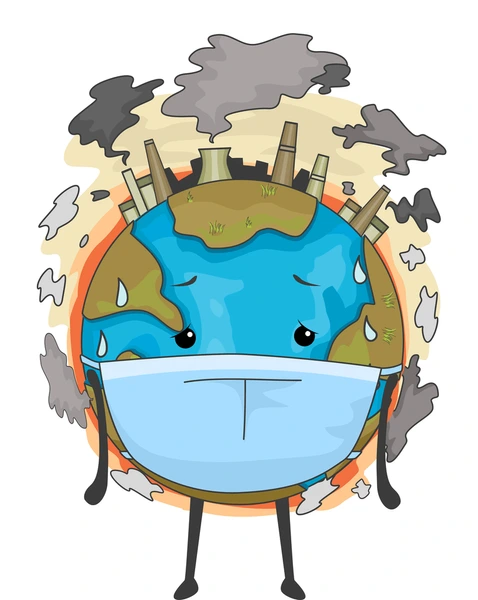

#Domain of the dataset

The air quality dataset lies under the domain of enviornmental sciences and public health. It classifies the air into four categories: Good, Moderate, Poor, and Hazardeous.

In [3]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the dataset
aq = pd.read_csv("/content/updated_pollution_dataset (1).csv")
aq.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [5]:
aq.tail()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good
4999,24.1,77.9,81.7,94.3,23.2,10.5,1.38,8.3,461,Moderate


In [6]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
aq.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [8]:
aq.isna().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [9]:
aq.shape

(5000, 10)

# Detecting Outliers
Using z-score to detect outliers by setting a threshold and then removing them.

In [10]:
# Calculate z-scores for all numerical columns
numerical_cols = aq.select_dtypes(include=np.number).columns
aq_zscore = aq[numerical_cols].apply(lambda x: np.abs((x - x.mean()) / x.std()))

threshold = 3

# Identify outliers
outliers = aq_zscore > threshold

aq_no_outliers = aq[~outliers.any(axis=1)]

print(f"Original shape: {aq.shape}")
print(f"Shape after removing outliers: {aq_no_outliers.shape}")

Original shape: (5000, 10)
Shape after removing outliers: (4742, 10)


In [11]:
aq_no_outliers.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


# Min-Max Scaler
Using min-max scaler to scale the numerical values between 0 and 1.

In [12]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = aq_no_outliers.select_dtypes(include=np.number).columns

scaler = MinMaxScaler()
aq_scaled = aq_no_outliers.copy()
aq_scaled[numerical_cols] = scaler.fit_transform(aq_no_outliers[numerical_cols])

aq_scaled.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,0.449315,0.284133,0.055437,0.162041,0.253863,0.423077,0.434959,0.227545,0.171691,Moderate
1,0.408219,0.487085,0.024520,0.111012,0.516556,0.436813,0.402439,0.209581,0.554391,Moderate
2,0.265753,0.476015,0.284648,0.304387,0.375276,0.516484,0.398374,0.161677,0.564875,Moderate
3,0.375342,0.038130,0.065032,0.058192,0.134658,0.315934,0.203252,0.514970,0.475754,Good
4,0.358904,0.426814,0.073561,0.145031,0.320088,0.324176,0.146341,0.610778,0.150721,Good


# Label Encoder
Applying label encoder to the class column named Air Quality.

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
aq_scaled['Air Quality'] = label_encoder.fit_transform(aq_scaled['Air Quality'])

aq_scaled.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,0.449315,0.284133,0.055437,0.162041,0.253863,0.423077,0.434959,0.227545,0.171691,2
1,0.408219,0.487085,0.024520,0.111012,0.516556,0.436813,0.402439,0.209581,0.554391,2
2,0.265753,0.476015,0.284648,0.304387,0.375276,0.516484,0.398374,0.161677,0.564875,2
3,0.375342,0.038130,0.065032,0.058192,0.134658,0.315934,0.203252,0.514970,0.475754,0
4,0.358904,0.426814,0.073561,0.145031,0.320088,0.324176,0.146341,0.610778,0.150721,0


# Visual Representation
Plotting graphs of the features available in the dataset

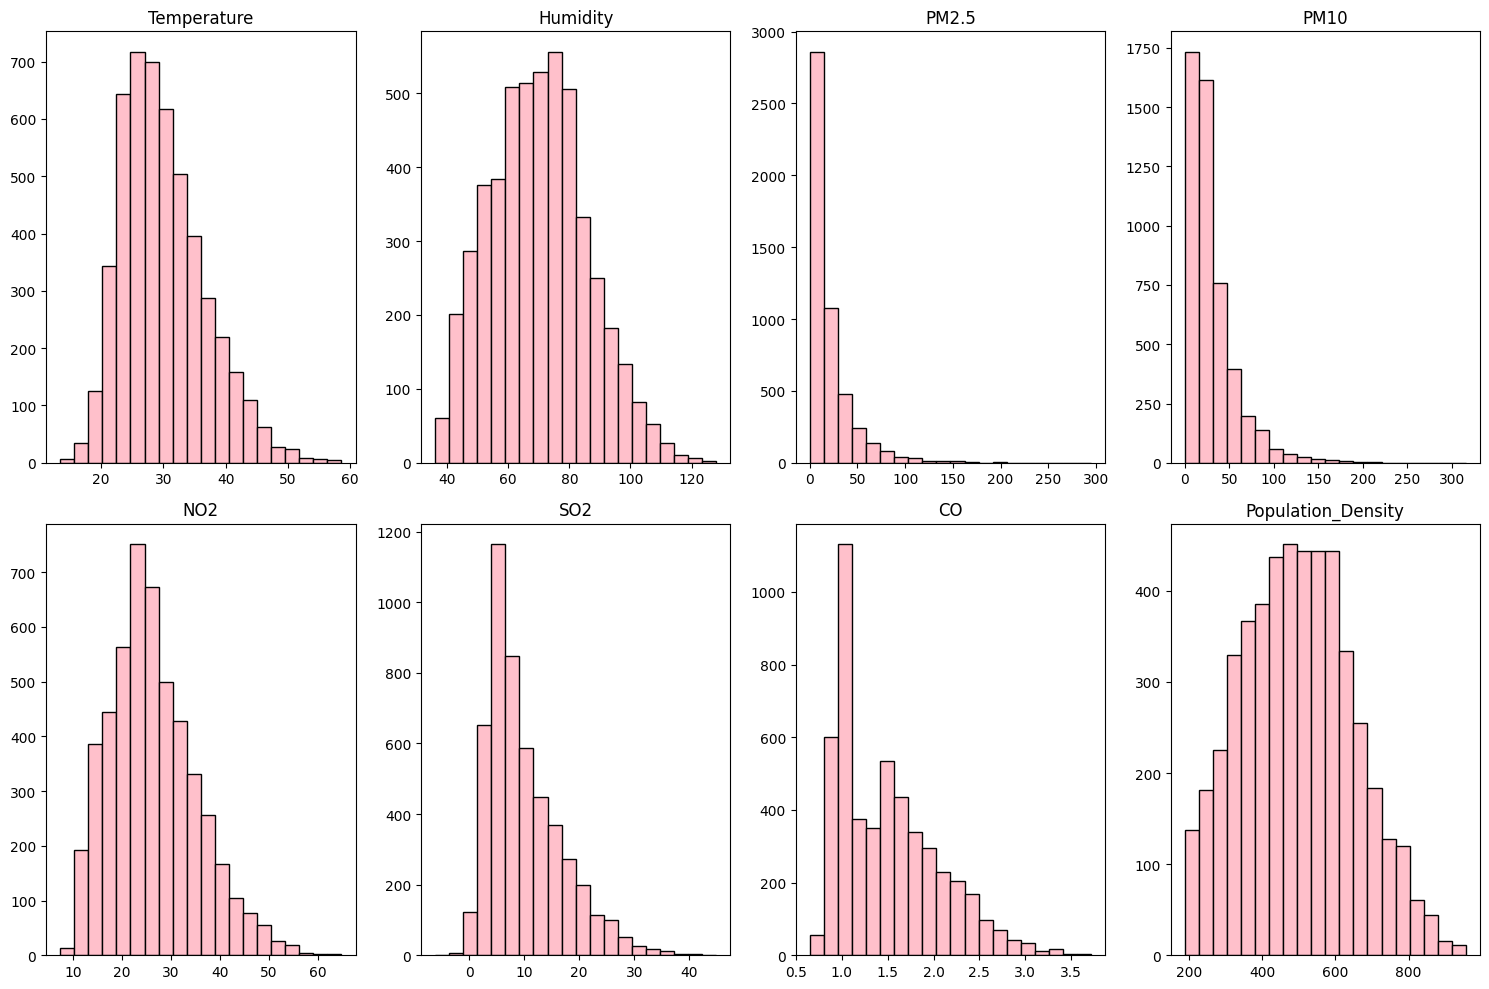

In [14]:
# Histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.hist(aq['Temperature'], bins=20, color='pink', edgecolor='black')
plt.title('Temperature')

plt.subplot(2, 4, 2)
plt.hist(aq['Humidity'], bins=20, color='pink', edgecolor='black')
plt.title('Humidity')

plt.subplot(2, 4, 3)
plt.hist(aq['PM2.5'], bins=20, color='pink', edgecolor='black')
plt.title('PM2.5')

plt.subplot(2, 4, 4)
plt.hist(aq['PM10'], bins=20, color='pink', edgecolor='black')
plt.title('PM10')

plt.subplot(2, 4, 5)
plt.hist(aq['NO2'], bins=20, color='pink', edgecolor='black')
plt.title('NO2')

plt.subplot(2, 4, 6)
plt.hist(aq['SO2'], bins=20, color='pink', edgecolor='black')
plt.title('SO2')

plt.subplot(2, 4, 7)
plt.hist(aq['CO'], bins=20, color='pink', edgecolor='black')
plt.title('CO')

plt.subplot(2, 4, 8)
plt.hist(aq['Population_Density'], bins=20, color='pink', edgecolor='black')
plt.title('Population_Density')

plt.tight_layout()
plt.show()

# Correlation Heatmap
To find the relation between features and their impact.

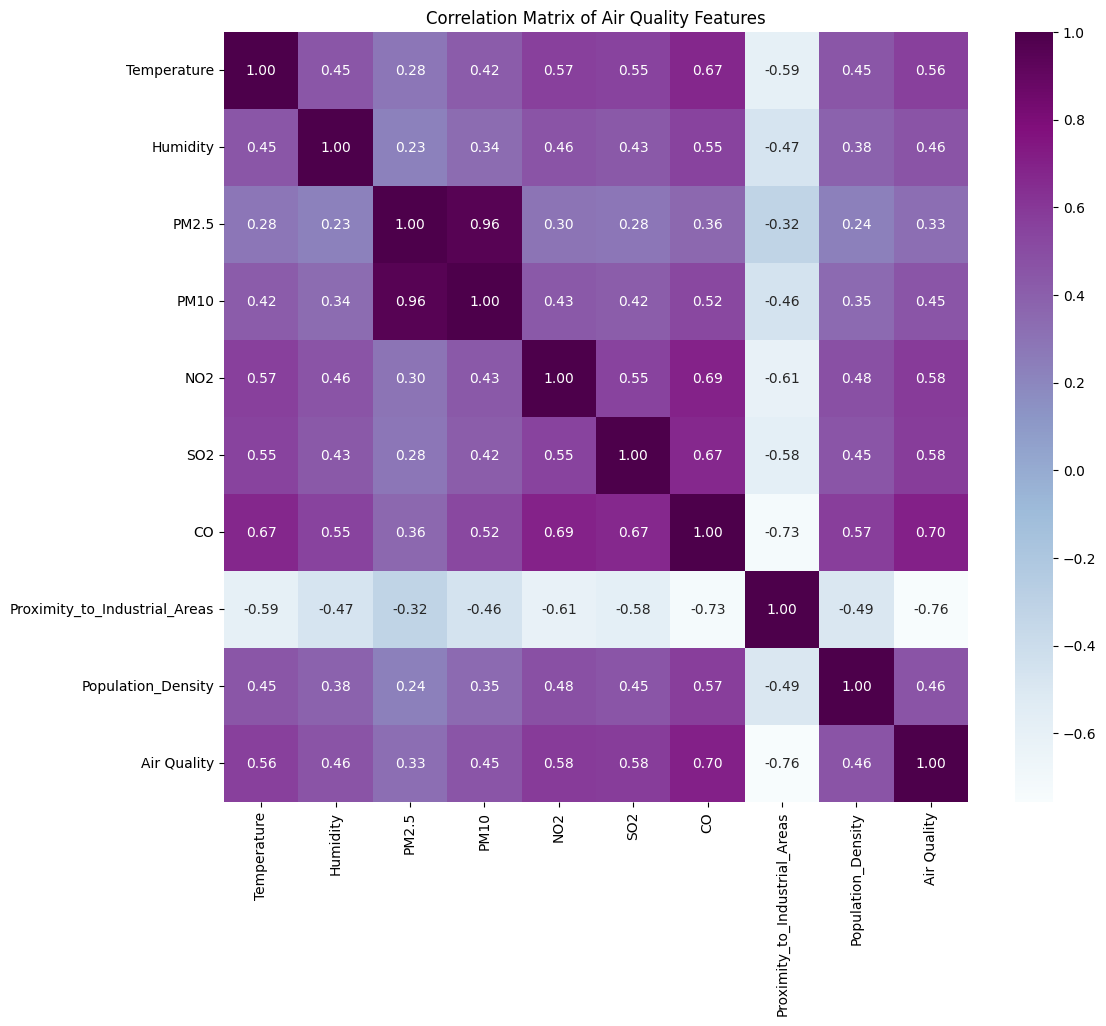

In [15]:
correlation_matrix = aq_scaled.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Correlation Matrix of Air Quality Features')
plt.show()

Selecting features that have a minimum threshold of 0.5

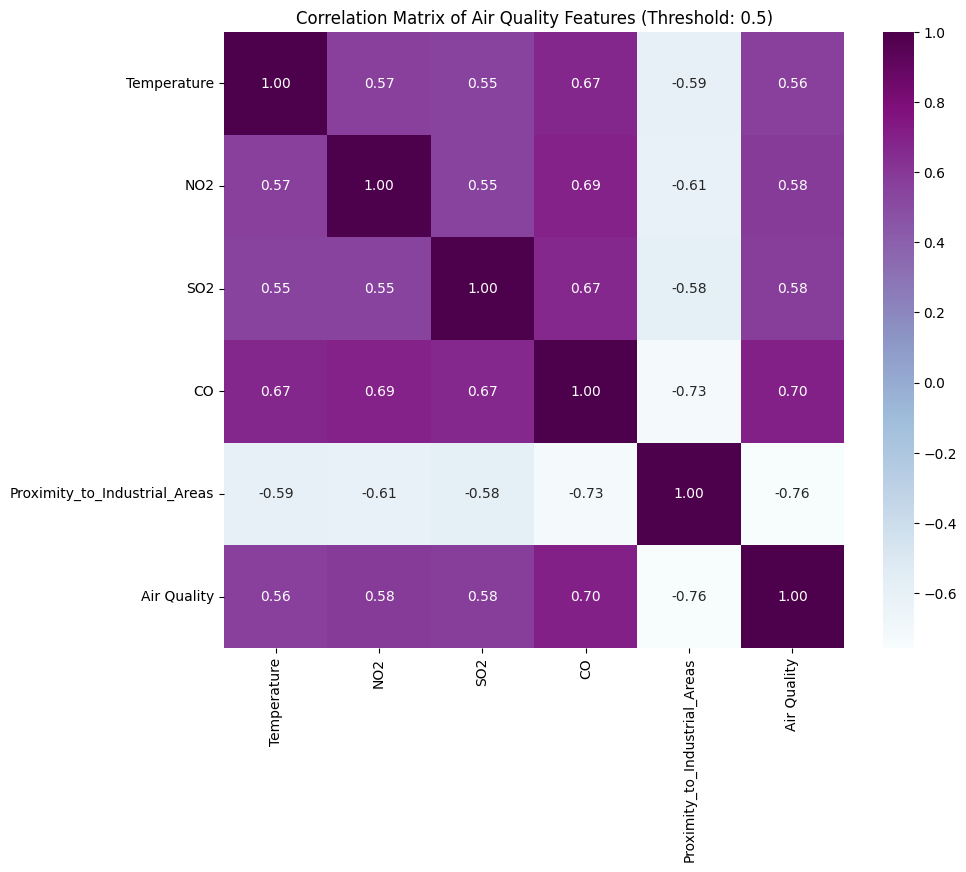

In [16]:
threshold = 0.5

correlated_features = correlation_matrix[abs(correlation_matrix['Air Quality']) > threshold].index

new_correlation_matrix = aq_scaled[correlated_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(new_correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title(f'Correlation Matrix of Air Quality Features (Threshold: {threshold})')
plt.show()


# Multiple-Layer Perceptron using library
Implementing a Multiple-layer Perceptron using the MLP Classifier.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

X = aq_scaled[correlated_features.drop('Air Quality')]  # Features
y = aq_scaled['Air Quality']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=150, random_state=0)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9220231822971549
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       410
           1       0.93      0.55      0.69        67
           2       0.90      0.96      0.93       271
           3       0.82      0.84      0.83       201

    accuracy                           0.92       949
   macro avg       0.91      0.84      0.86       949
weighted avg       0.92      0.92      0.92       949



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


converting the dataframe to numpy array

In [18]:
X_test_HC = aq_scaled[correlated_features.drop('Air Quality')].to_numpy()  # Features
y_test_HC = aq_scaled['Air Quality'].to_numpy()  # Target variable

# Single-Layer Perceptron without library
implementing a single-layer perceptron by hard coding.


In [19]:
import numpy as np

class HardcodedPerceptron:
    def __init__(self):
        self.weights = np.array([0.3, -0.4, 0.2, 0.5, -0.4])
        self.bias = -0.1

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        X = np.array(X, dtype=float)
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._step_function(linear_output)
        return y_predicted

X_test_HP = np.array(X_test_HC)
y_test_HP = np.array(y_test_HC)

hardcoded_perceptron = HardcodedPerceptron()

y_pred = hardcoded_perceptron.predict(X_test_HP)

accuracy = np.mean(y_pred == y_test_HP)
print(f"Hardcoded Perceptron Accuracy: {accuracy}")

Hardcoded Perceptron Accuracy: 0.48544917756221


# Loss function convergence graph


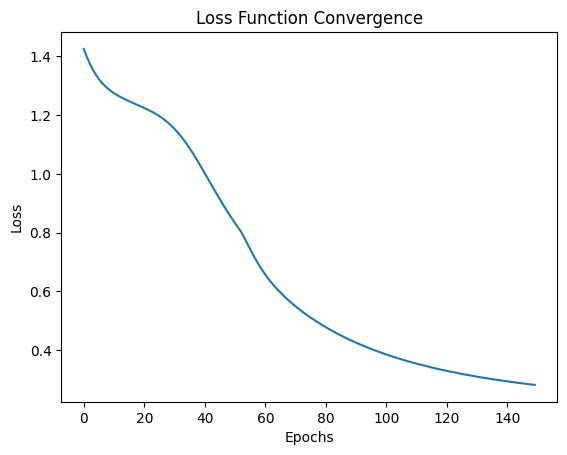

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

plt.plot(mlp.loss_curve_)
plt.title("Loss Function Convergence")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


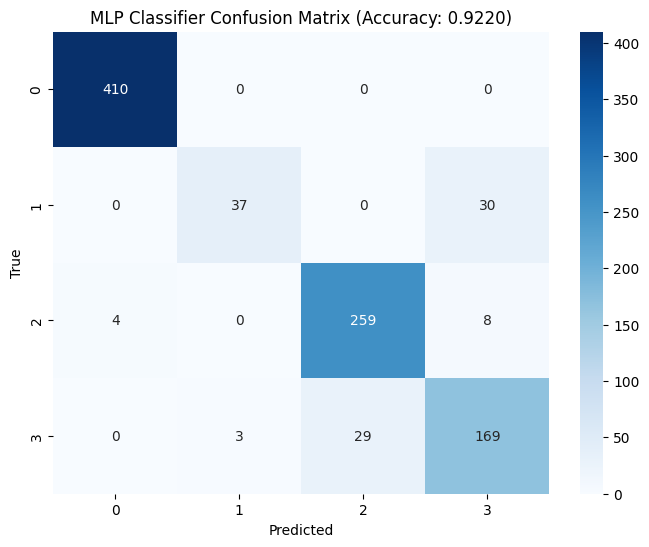

MLP Classifier Accuracy: 0.9220231822971549


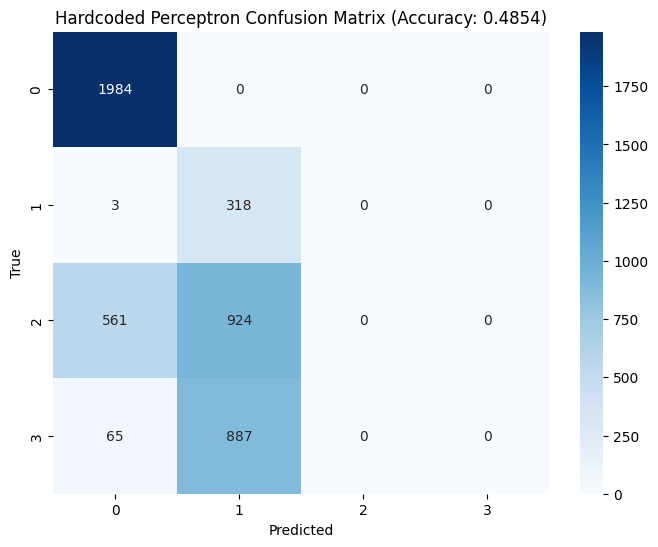

Hardcoded Perceptron Accuracy: 0.48544917756221


In [21]:
# MLP classifier
y_pred_mlp = mlp.predict(X_test)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues")
plt.title(f"MLP Classifier Confusion Matrix (Accuracy: {accuracy_mlp:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"MLP Classifier Accuracy: {accuracy_mlp}")

# Hardcoded Perceptron
cm_hp = confusion_matrix(y_test_HP, y_pred)
accuracy_hp = accuracy_score(y_test_HP, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_hp, annot=True, fmt="d", cmap="Blues")
plt.title(f"Hardcoded Perceptron Confusion Matrix (Accuracy: {accuracy_hp:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"Hardcoded Perceptron Accuracy: {accuracy_hp}")

# Keras Model using tensorflow
Installing tensorflow

In [22]:
!pip install tensorflow

Defining and compiling the Model

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Define the Keras model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

num_classes = len(np.unique(y_train))
model.add(Dense(num_classes, activation='softmax')) # Use softmax for multiclass classification

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=100, # Increase epochs for better training
                    batch_size=32,
                    validation_split=0.2) # Use a validation split to monitor overfitting

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"TensorFlow Keras Model Accuracy: {accuracy}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5579 - loss: 1.1178 - val_accuracy: 0.8630 - val_loss: 0.5391
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8013 - loss: 0.5635 - val_accuracy: 0.8827 - val_loss: 0.3655
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8458 - loss: 0.4059 - val_accuracy: 0.8972 - val_loss: 0.3057
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8650 - loss: 0.3492 - val_accuracy: 0.9144 - val_loss: 0.2788
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8638 - loss: 0.3385 - val_accuracy: 0.9223 - val_loss: 0.2504
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8790 - loss: 0.3089 - val_accuracy: 0.9130 - val_loss: 0.2362
Epoch 7/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8884 - loss: 0.2901 - val_accuracy: 0.9183 - val_loss: 0.2231
Epoch 8/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8926 - loss: 0.2729 - val_accuracy: 0.9209 - val_loss: 0.2

##Keras Model loss and accuracy

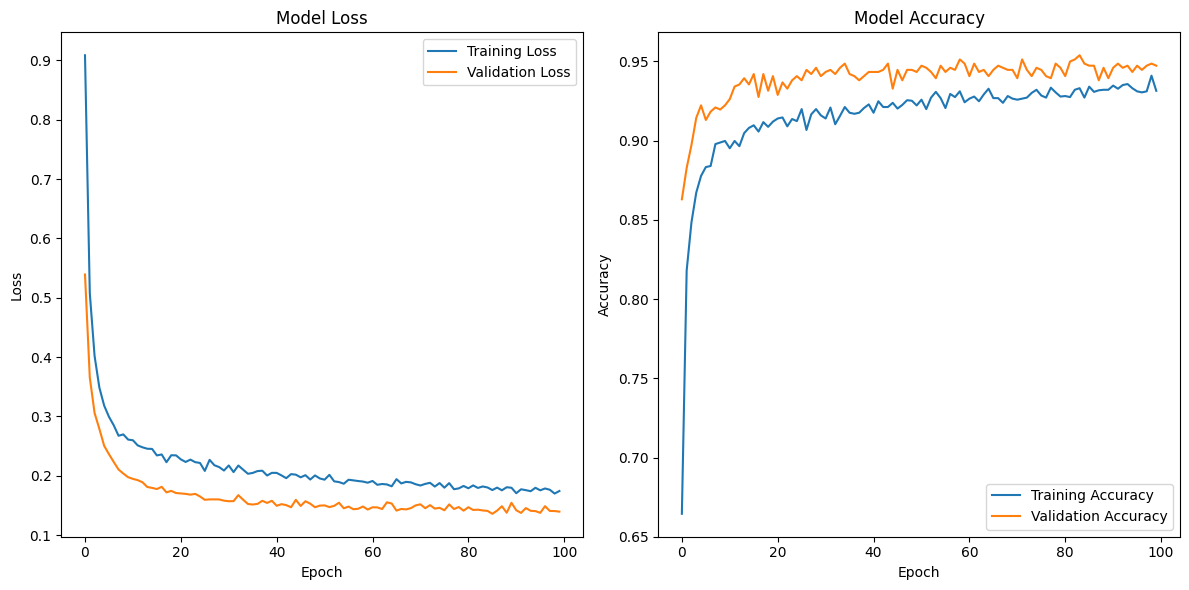

In [24]:
# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


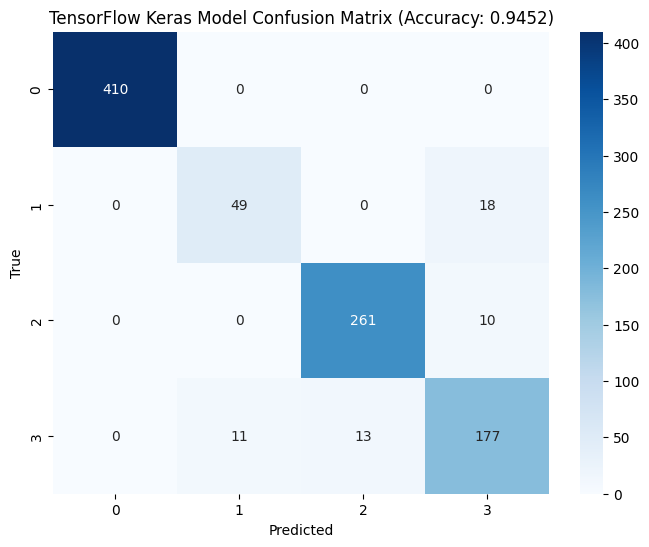

TensorFlow Keras Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       0.82      0.73      0.77        67
           2       0.95      0.96      0.96       271
           3       0.86      0.88      0.87       201

    accuracy                           0.95       949
   macro avg       0.91      0.89      0.90       949
weighted avg       0.94      0.95      0.94       949



In [25]:
# Make predictions and show confusion matrix
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

cm_keras = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_keras, annot=True, fmt="d", cmap="Blues")
plt.title(f"TensorFlow Keras Model Confusion Matrix (Accuracy: {accuracy:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("TensorFlow Keras Model Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Ensemble Method

In [26]:
# Get predictions from the MLPClassifier and the Keras model
y_pred_mlp_ensemble = mlp.predict(X_test)
y_pred_keras_ensemble_probs = model.predict(X_test)
y_pred_keras_ensemble = np.argmax(y_pred_keras_ensemble_probs, axis=1)

# Apply a simple voting ensemble
ensemble_predictions = []
for i in range(len(y_test)):
    if y_pred_mlp_ensemble[i] == y_pred_keras_ensemble[i]:
        ensemble_predictions.append(y_pred_mlp_ensemble[i])
    else:
        ensemble_predictions.append(y_pred_mlp_ensemble[i])

ensemble_predictions = np.array(ensemble_predictions)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)
cm_ensemble = confusion_matrix(y_test, ensemble_predictions)

print(f"\nEnsemble Model Accuracy (MLP + Keras): {accuracy_ensemble}")
print("\nEnsemble Model Classification Report:")
print(classification_report(y_test, ensemble_predictions))

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Ensemble Model Accuracy (MLP + Keras): 0.9220231822971549

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       410
           1       0.93      0.55      0.69        67
           2       0.90      0.96      0.93       271
           3       0.82      0.84      0.83       201

    accuracy                           0.92       949
   macro avg       0.91      0.84      0.86       949
weighted avg       0.92      0.92      0.92       949



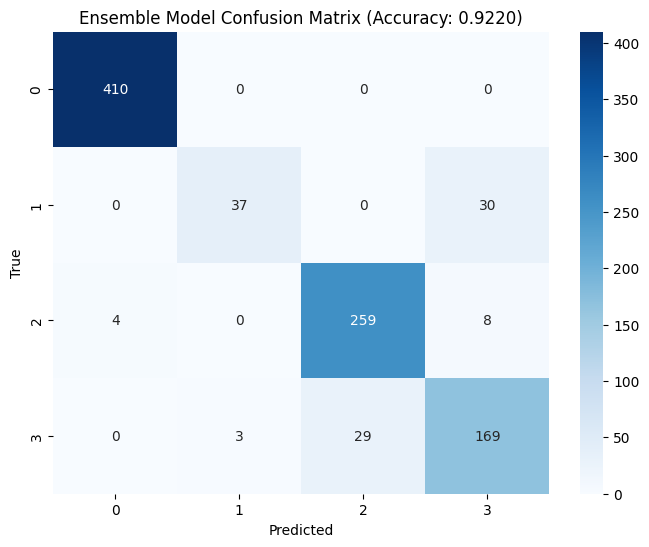

In [27]:
# Plot the confusion matrix for the ensemble model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt="d", cmap="Blues")
plt.title(f"Ensemble Model Confusion Matrix (Accuracy: {accuracy_ensemble:.4f})")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Model Comparison

<ipython-input-28-2799225216>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


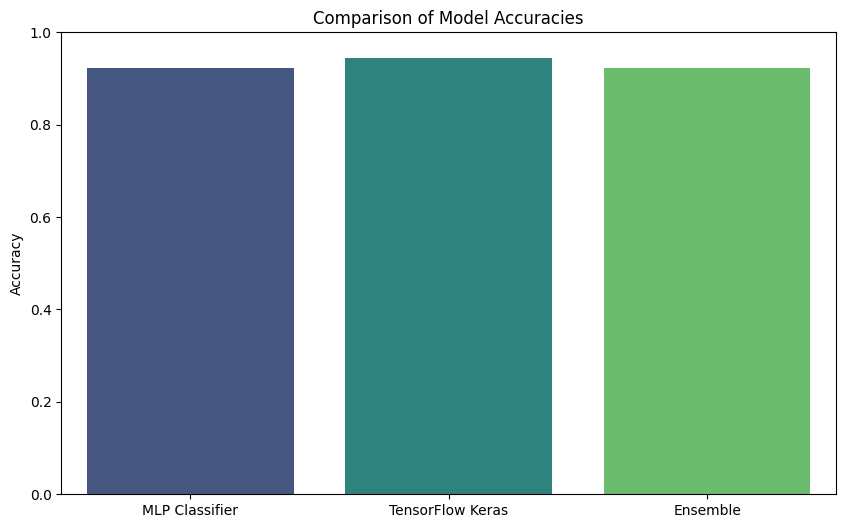

In [28]:
# Visualize and compare the performance of the models
models = ['MLP Classifier', 'TensorFlow Keras', 'Ensemble']
accuracies = [accuracy_mlp, accuracy, accuracy_ensemble]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()

# Clustering

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Perform KMeans clustering on the features used for the neural network
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X)

# Add the cluster labels back to the scaled dataframe
aq_scaled['Cluster'] = clusters

# Map cluster labels to air quality labels
cluster_mapping = {
    0: 'Good',
    1: 'Moderate',
    2: 'Poor',
    3: 'Hazardous'
}

aq_scaled['Predicted_Air_Quality_Cluster'] = aq_scaled['Cluster'].map(cluster_mapping)

print("DataFrame with Cluster Labels:")
print(aq_scaled[['Air Quality', 'Cluster', 'Predicted_Air_Quality_Cluster']].head())

# Evaluate how well the clusters align with the original air quality labels
# We can use a confusion matrix to see the distribution of original labels within each cluster
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix: Original Air Quality vs. KMeans Clusters")
print(confusion_matrix(aq_scaled['Air Quality'], aq_scaled['Cluster']))

DataFrame with Cluster Labels:
   Air Quality  Cluster Predicted_Air_Quality_Cluster
0            2        2                          Poor
1            2        2                          Poor
2            2        2                          Poor
3            0        0                          Good
4            0        0                          Good

Confusion Matrix: Original Air Quality vs. KMeans Clusters
[[1984    0    0    0]
 [   0  256    0   65]
 [  65    2 1356   62]
 [   1  332  156  463]]


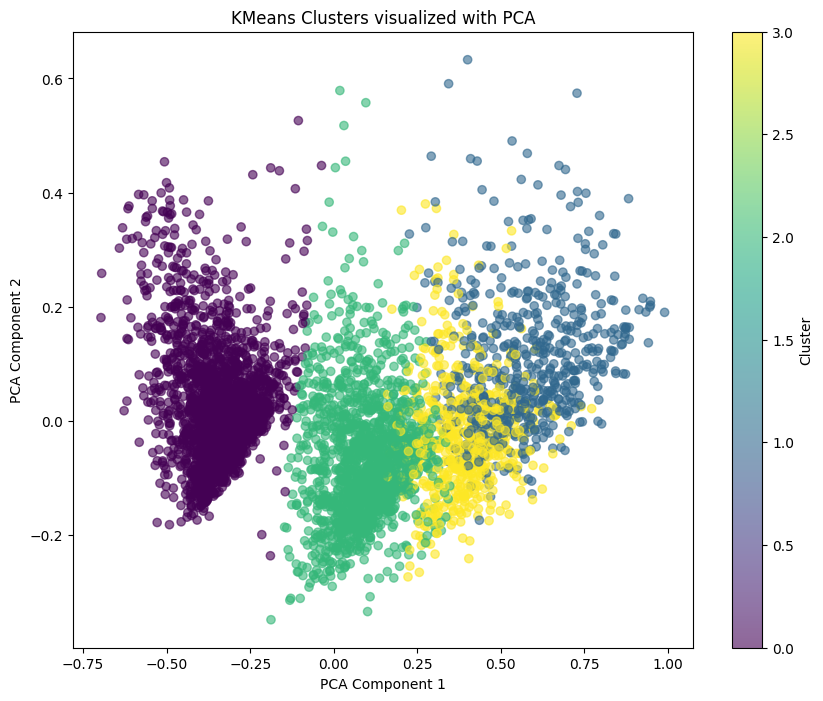

In [30]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('KMeans Clusters visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

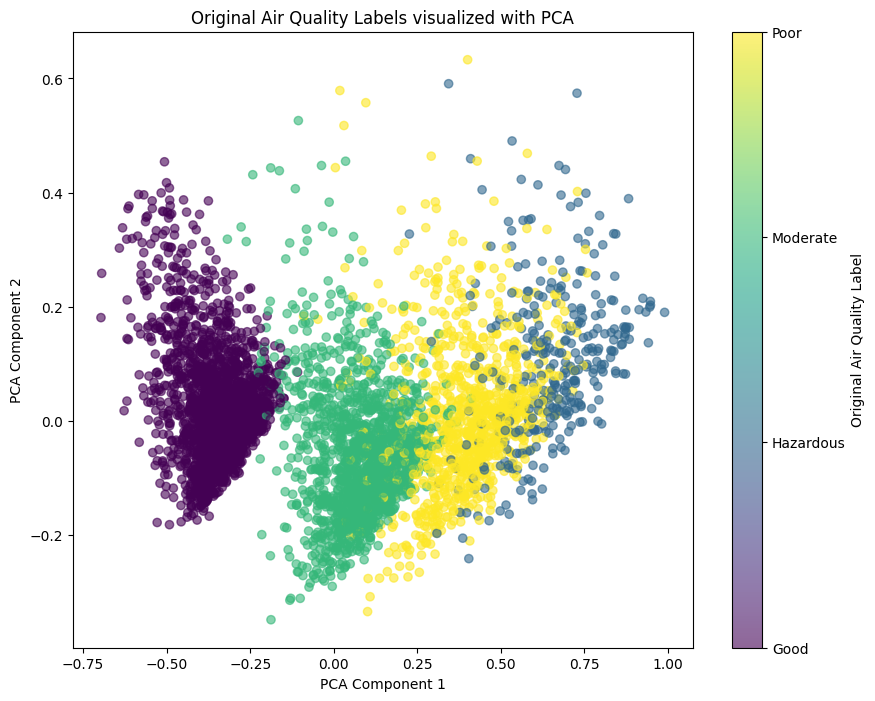

In [31]:
# Visualize the clusters based on the original air quality labels for comparison
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=aq_scaled['Air Quality'], cmap='viridis', alpha=0.6)
plt.title('Original Air Quality Labels visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
cbar = plt.colorbar(scatter, label='Original Air Quality Label')
cbar.set_ticks(np.unique(aq_scaled['Air Quality']))
cbar.set_ticklabels(label_encoder.classes_)
plt.show()

# Gradio interface

In [ ]:
import gradio as gr
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
label_encoder = LabelEncoder()
mlp = MLPClassifier()
correlated_features = pd.Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Population_Density'])

scaler.fit(np.random.rand(10, 8))
label_encoder.fit(['Good', 'Moderate', 'Poor', 'Hazardous'])
mlp.fit(np.random.rand(10, 8), np.random.randint(0, 4, size=10))

class DummyKerasModel:
    def predict(self, x): return np.random.rand(x.shape[0], 4)
model = DummyKerasModel()

def predict_air_quality(temperature, humidity, pm25, pm10, no2, so2, co, population_density, model_choice):
    input_data = {
        'Temperature': [temperature],
        'Humidity': [humidity],
        'PM2.5': [pm25],
        'PM10': [pm10],
        'NO2': [no2],
        'SO2': [so2],
        'CO': [co],
        'Population_Density': [population_density]
    }
    input_df = pd.DataFrame(input_data)
    input_scaled = input_df.copy()
    input_scaled[correlated_features] = scaler.transform(input_df[correlated_features])

    predicted_label = "Error during prediction"
    try:
        if model_choice == "MLP Classifier":
            prediction = mlp.predict(input_scaled[correlated_features])
            predicted_label = label_encoder.inverse_transform(prediction)[0]
        elif model_choice == "TensorFlow Keras":
            prediction_probs = model.predict(input_scaled[correlated_features])
            prediction = np.argmax(prediction_probs, axis=1)
            predicted_label = label_encoder.inverse_transform(prediction)[0]
        elif model_choice == "Ensemble (MLP + Keras)":
            pred_mlp = mlp.predict(input_scaled[correlated_features])
            pred_keras = np.argmax(model.predict(input_scaled[correlated_features]), axis=1)
            ensemble_prediction = pred_mlp[0] if pred_mlp[0] == pred_keras[0] else pred_mlp[0]
            predicted_label = label_encoder.inverse_transform([ensemble_prediction])[0]
    except Exception as e:
        predicted_label = f"Prediction Error: {e}"

    return predicted_label

inputs = [
    gr.Slider(10, 50, step=0.1, label="Temperature (°C)"),
    gr.Slider(0, 100, step=0.1, label="Humidity (%)"),
    gr.Slider(0, 300, step=0.1, label="PM2.5 (µg/m³)"),
    gr.Slider(0, 400, step=0.1, label="PM10 (µg/m³)"),
    gr.Slider(0, 150, step=0.1, label="NO2 (µg/m³)"),
    gr.Slider(0, 100, step=0.1, label="SO2 (µg/m³)"),
    gr.Slider(0, 10, step=0.1, label="CO (ppm)"),
    gr.Slider(100, 5000, step=10, label="Population Density (people/km²)"),
    gr.Radio(["MLP Classifier", "TensorFlow Keras", "Ensemble (MLP + Keras)"], label="Choose Model")
]

iface = gr.Interface(
    fn=predict_air_quality,
    inputs=inputs,
    outputs=gr.Textbox(label="Predicted Air Quality"),
    title="🔮 Air Quality Predictor 💨",
    theme=gr.themes.Soft()
)

iface.launch(share=True, debug=True)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://a294ac05018b0dc3e1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
